In [1]:
# Exploratory Data Analysis (CPU-Bound)

# In this notebook I'll perform EDA to explain feature columns, 
# their relationships and overall everything we should know about the
# given dataset.

In [2]:
# Feature Columns

# time_ms = Timestamp of measurement in milliseconds

# cpu_psi_some_* = Shows how much time tasks are delayed because CPU is saturated. 

# cpu_psi_full_* = Percentage of time all non-idle tasks are stalled, waiting for CPU.  

# io_psi_some_* = Shows delay caused by storage / disk IO.

# io_psi_full_* = All runable tasks blocked on IO.

# mem_psi_some_* = Shows tasks waiting in memory.

# mem_psi_full_* = Shows all tasks stalled due to memory pressure.

# load_avg_* = Average number of runnable or IO-waiting tasks over time windows.

# procs_running = Number of processes currently runable.

# procs_blocked = Number of processes blocked waiting for IO completion.

# procs_disk_io = Processes specifically blocked on disk IO.

# Some -> At least 1 task waiting.
# Full -> Entire workload stalled.

In [3]:
# Imports

from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu, ks_2samp

sns.set_style("whitegrid")

In [4]:
# Read CSV files

PROJECT_ROOT = Path.cwd().parent
DATASET_DIR = PROJECT_ROOT / "datasets"
PRIO_DIR = DATASET_DIR / "prio-cpu.csv"
RR_DIR = DATASET_DIR / "rr-cpu.csv"

df_prio = pd.read_csv(PRIO_DIR)
df_rr = pd.read_csv(RR_DIR)

# df_prio.head(5)
# df_rr.head(5)

In [5]:
# Add scheduler label
df_prio["scheduler"] = "PRIORITY"
df_rr["scheduler"] = "RR"

# Add ID for both
df_prio["id"] = df_prio.index + 1
df_rr["id"] = df_rr.index + 1

In [6]:
# Combine
df = pd.concat([df_prio, df_rr], ignore_index=True)

In [9]:
# Basic Cleaning

# Sort by scheduler + time
df = df.sort_values(["scheduler", "time_ms"])

# Check missing
print(df.isna().sum())

time_ms             0
cpu_psi_some_10     0
cpu_psi_some_60     0
cpu_psi_some_300    0
cpu_psi_full_10     0
cpu_psi_full_60     0
cpu_psi_full_300    0
io_psi_some_10      0
io_psi_some_60      0
io_psi_some_300     0
io_psi_full_10      0
io_psi_full_60      0
io_psi_full_300     0
mem_psi_some_10     0
mem_psi_some_60     0
mem_psi_some_300    0
mem_psi_full_10     0
mem_psi_full_60     0
mem_psi_full_300    0
load_avg_1          0
load_avg_5          0
load_avg_15         0
procs_running       0
procs_blocked       0
procs_disk_io       0
scheduler           0
id                  0
dtype: int64


In [10]:
# Summary stats per scheduler

metrics = [c for c in df.columns if not c in ["time_ms", "scheduler"]]

summary = df.groupby("scheduler")[metrics].agg([
    "mean",
    "std",
    "median",
    # TODO Add quantiles to summary
    "max"
])

print(summary)

          cpu_psi_some_10                         cpu_psi_some_60            \
                     mean       std median    max            mean       std   
scheduler                                                                     
PRIORITY        16.584179  2.024765  16.31  21.44       15.698680  2.888478   
RR              15.830174  1.725423  15.88  19.70       15.481361  1.701262   

                        cpu_psi_some_300            ... procs_blocked      \
          median    max             mean       std  ...        median max   
scheduler                                           ...                     
PRIORITY   16.28  19.55        11.851580  4.292664  ...           0.0   2   
RR         15.87  17.20        15.828004  0.312363  ...           0.0   1   

          procs_disk_io                     id                          
                   mean  std median max   mean         std median  max  
scheduler                                                               

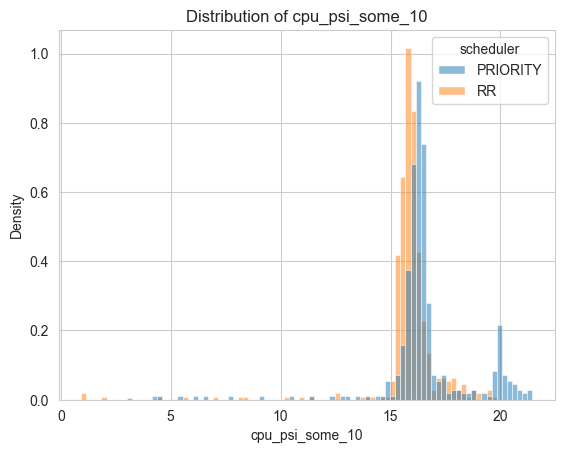

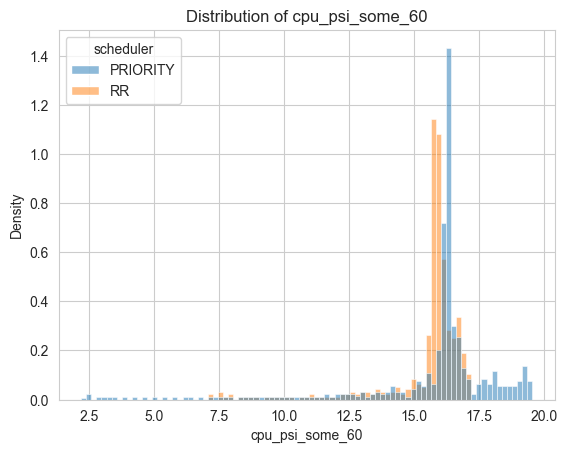

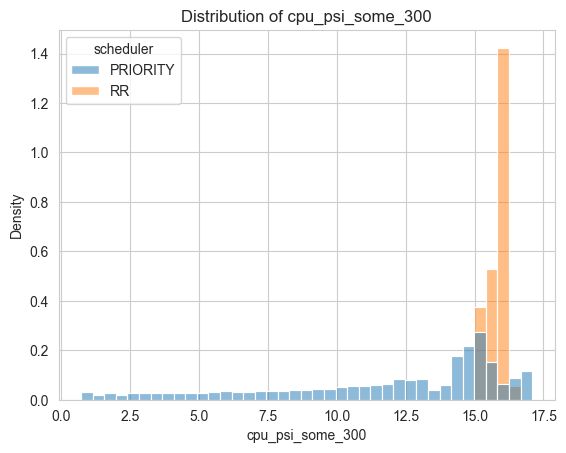

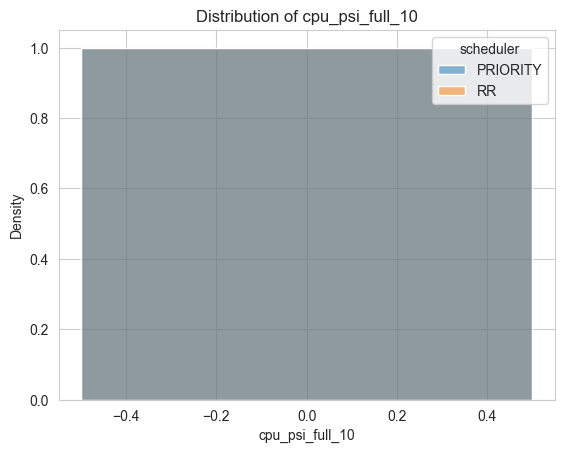

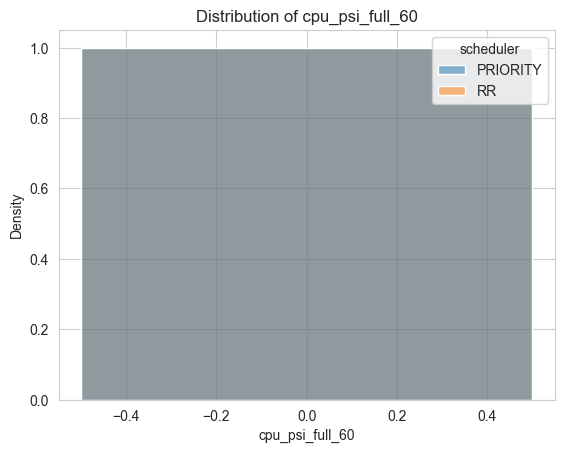

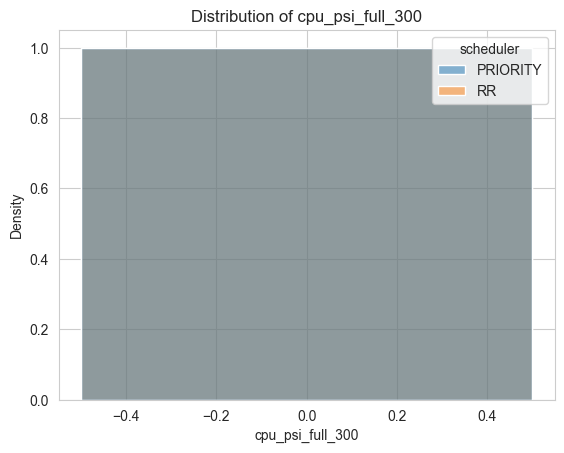

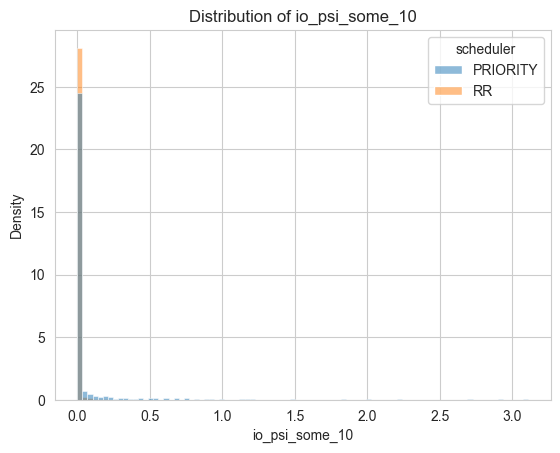

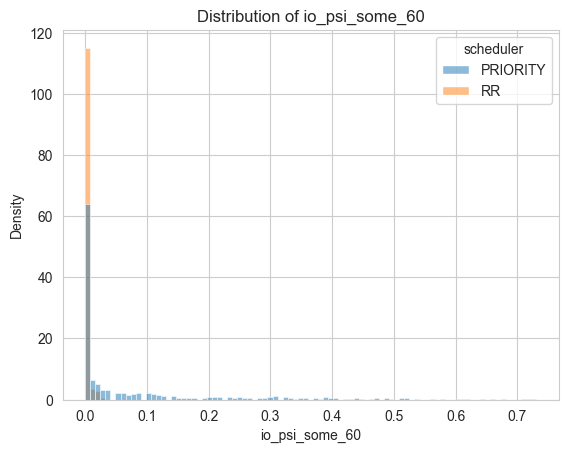

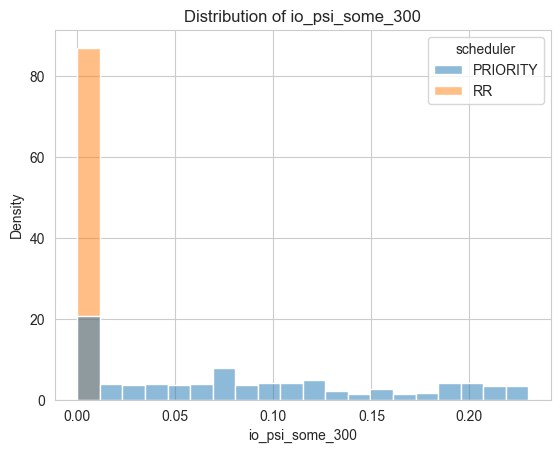

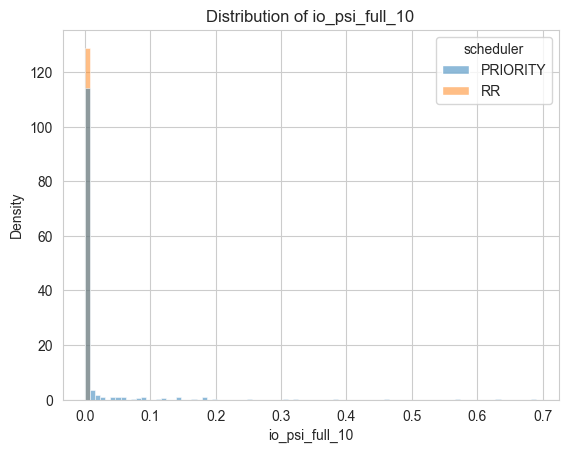

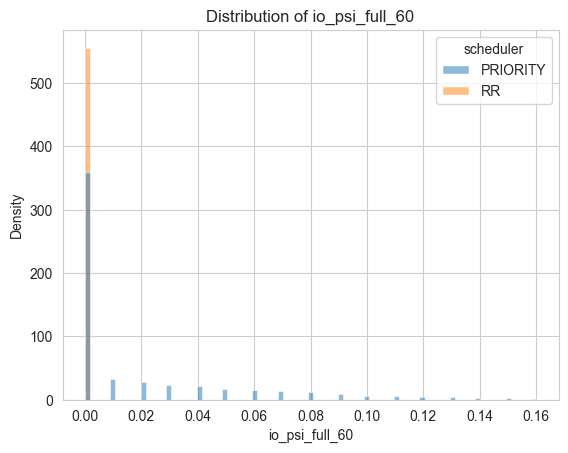

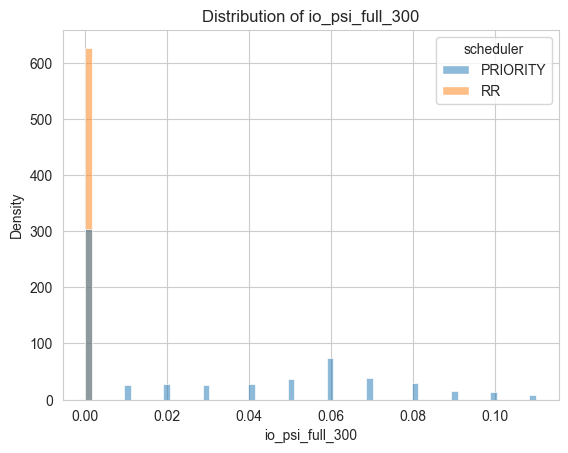

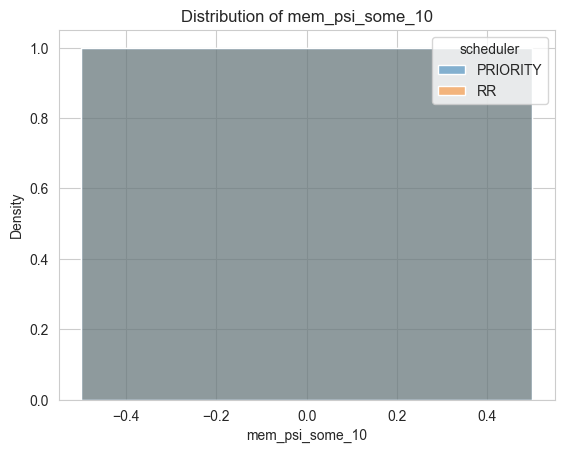

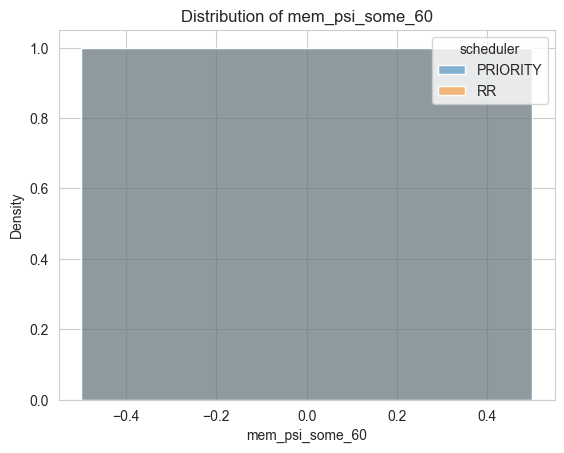

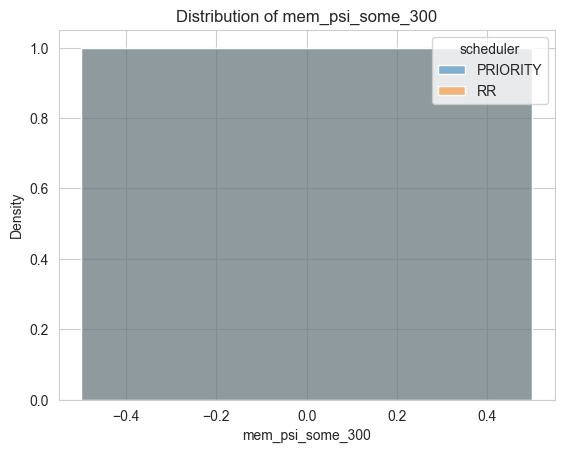

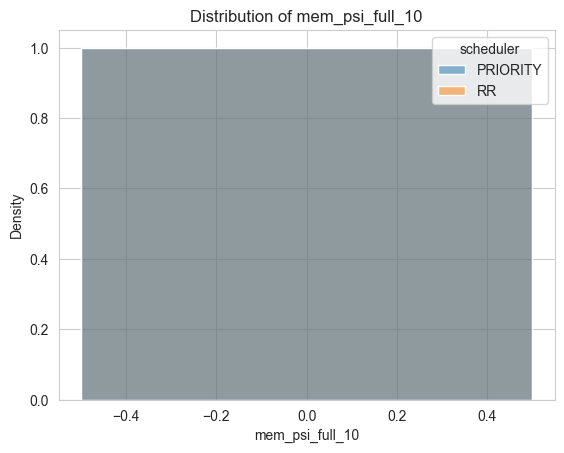

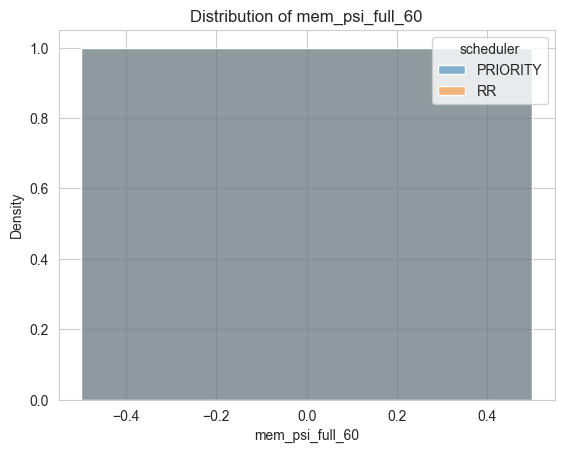

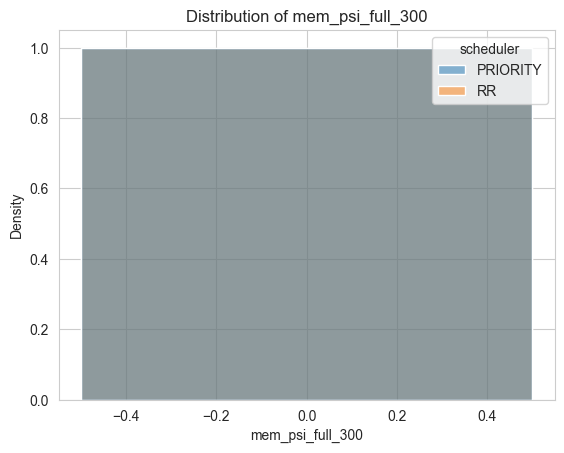

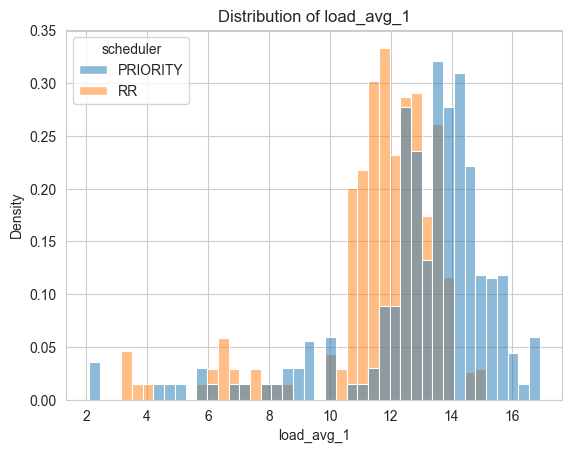

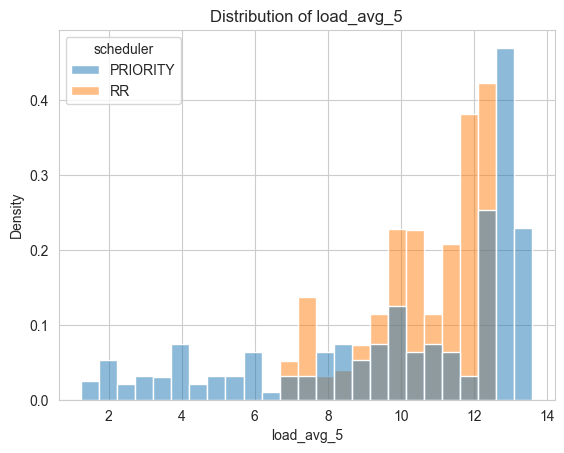

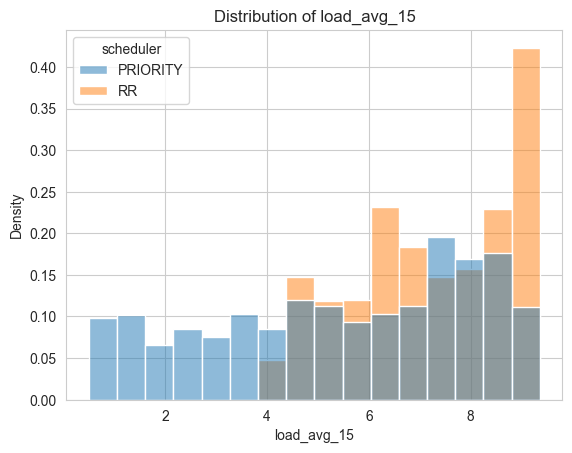

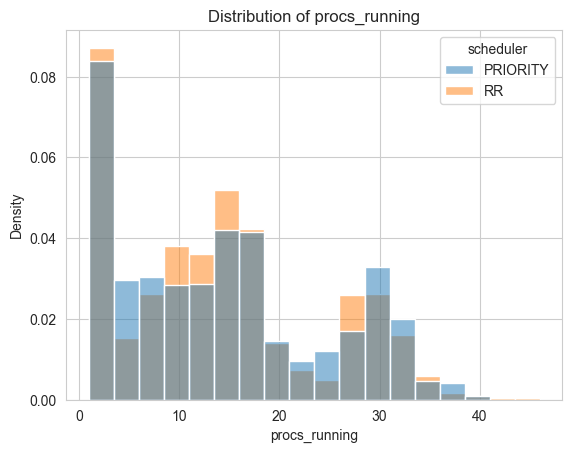

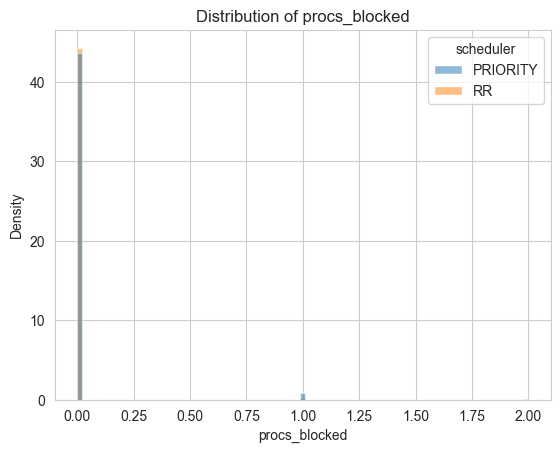

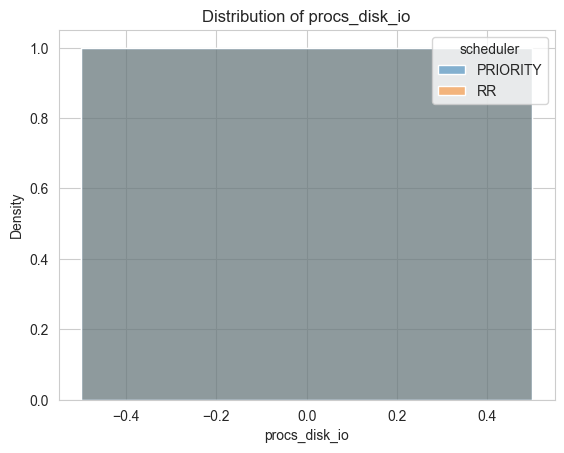

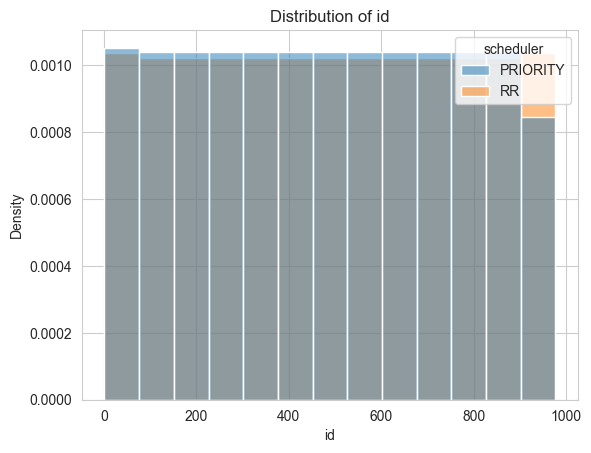

In [12]:
# Distribution Comparison - Histogram
for col in metrics:
    plt.figure()
    sns.histplot(data=df, x=col, hue="scheduler", kde=False, stat="density", common_norm=False)
    # KDE is off due to data having lots of zeroes, can't compute the line
    plt.title(f"Distribution of {col}")
    plt.show()

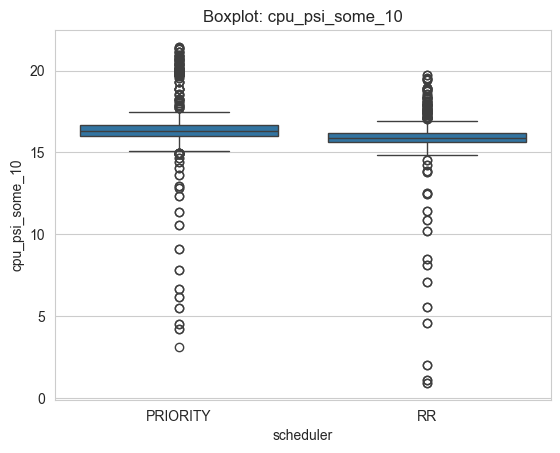

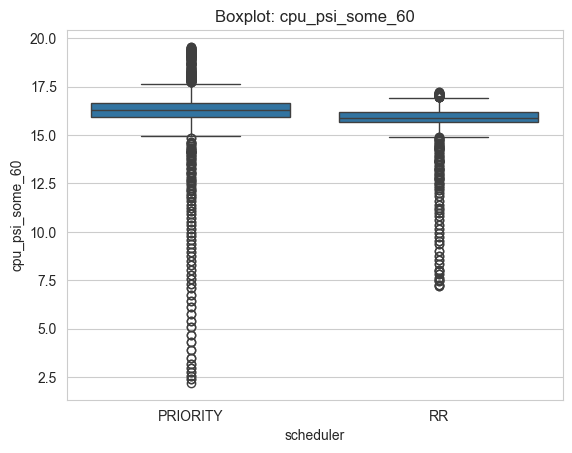

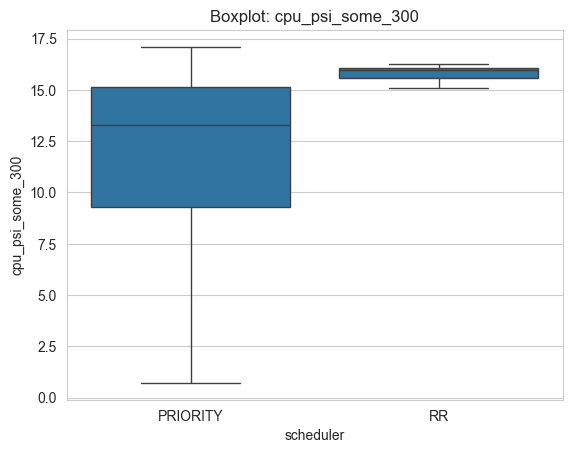

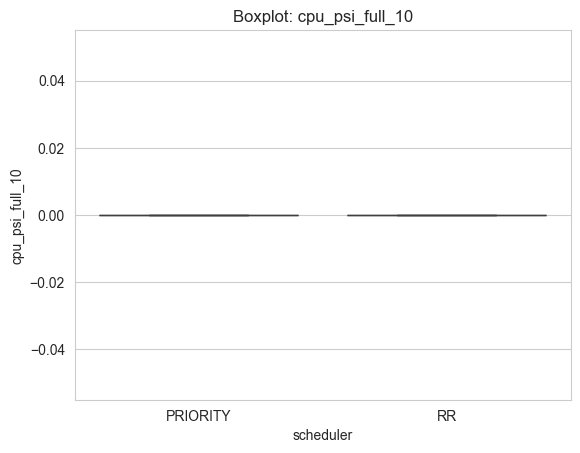

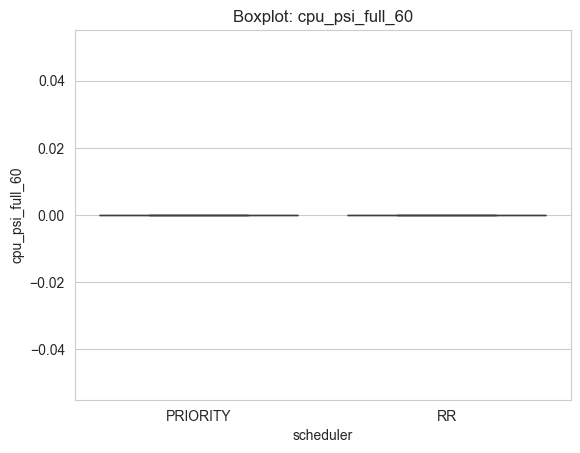

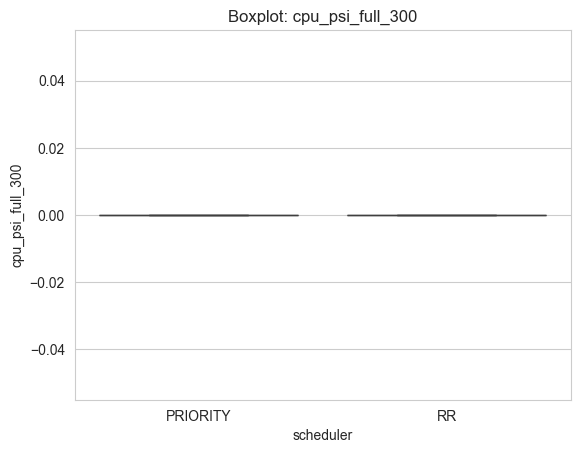

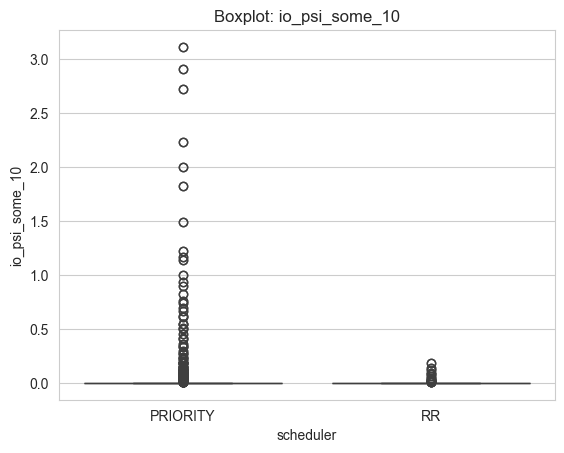

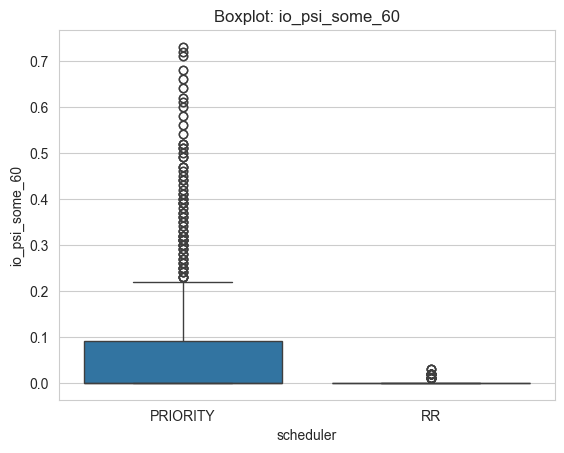

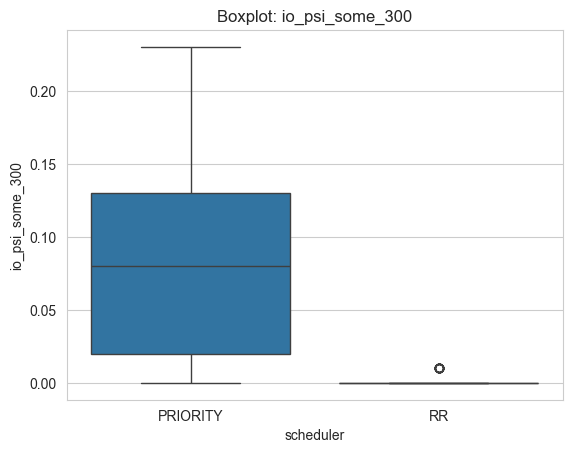

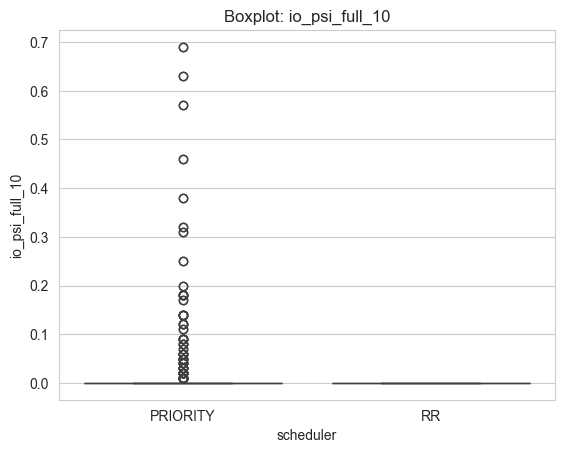

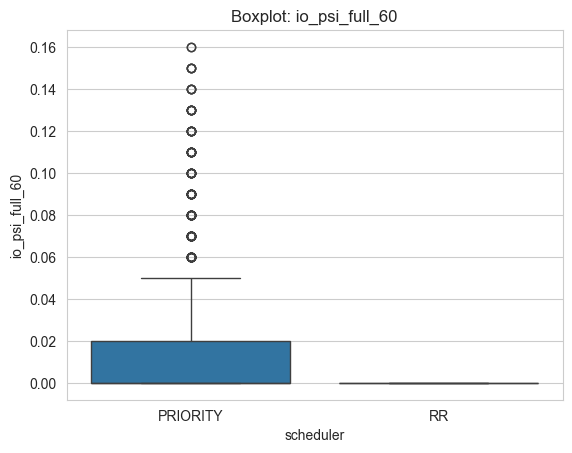

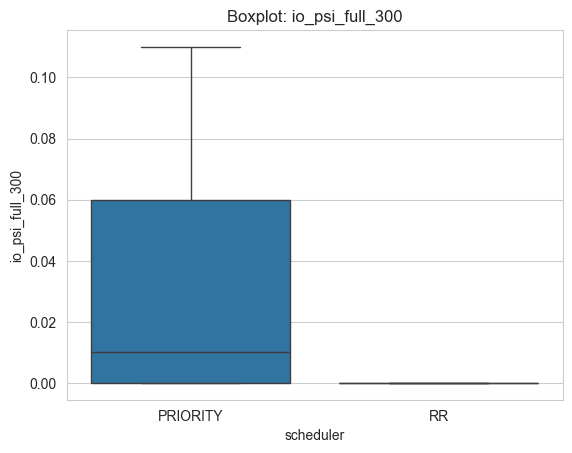

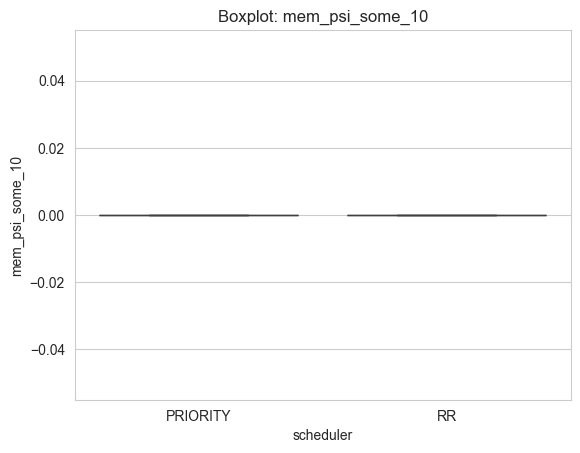

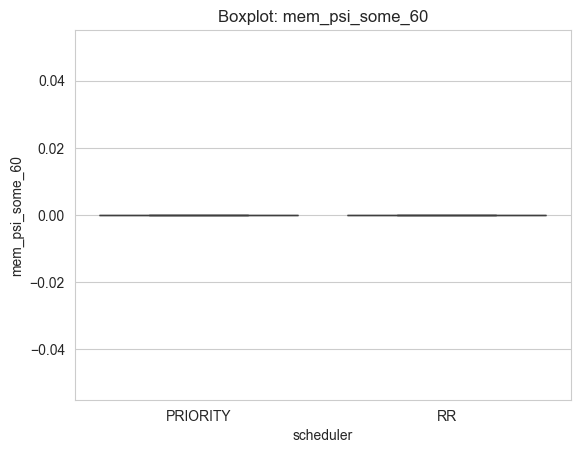

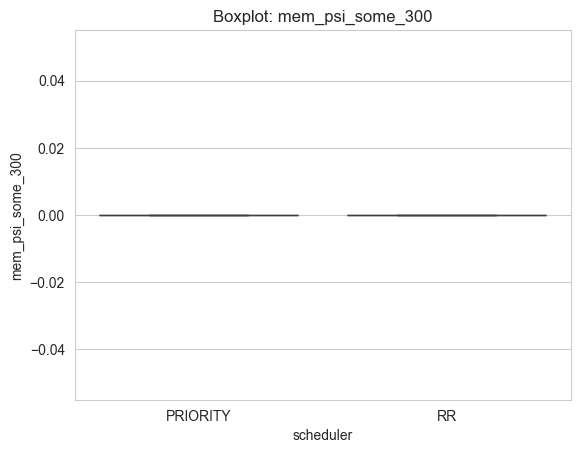

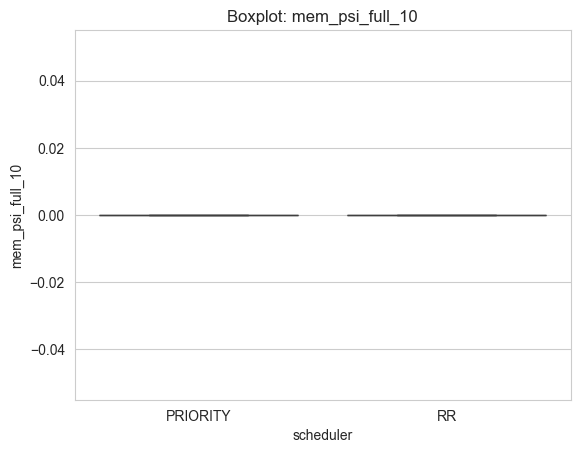

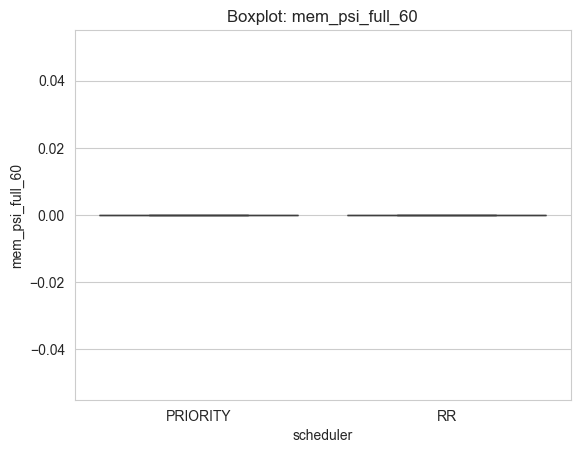

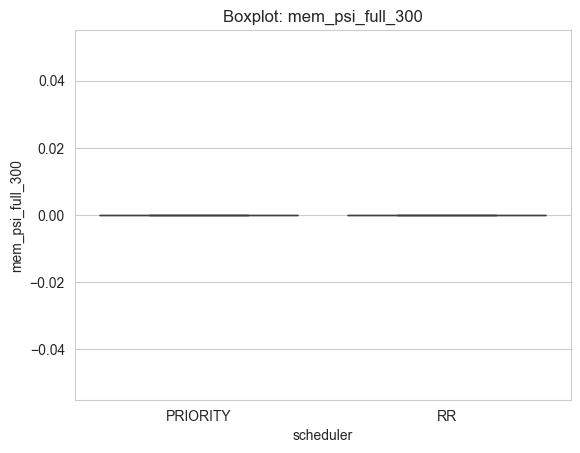

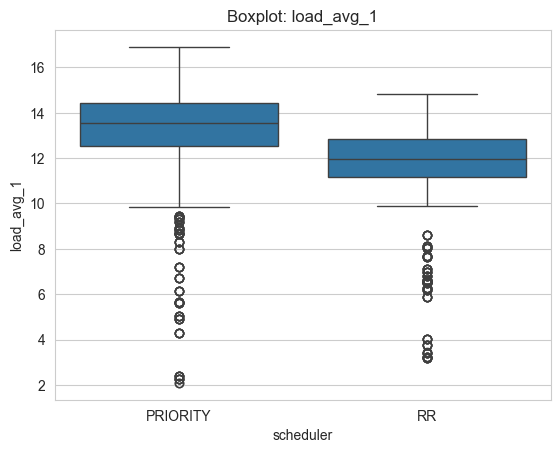

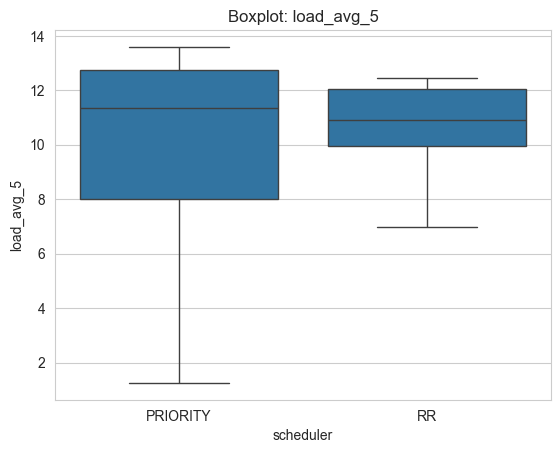

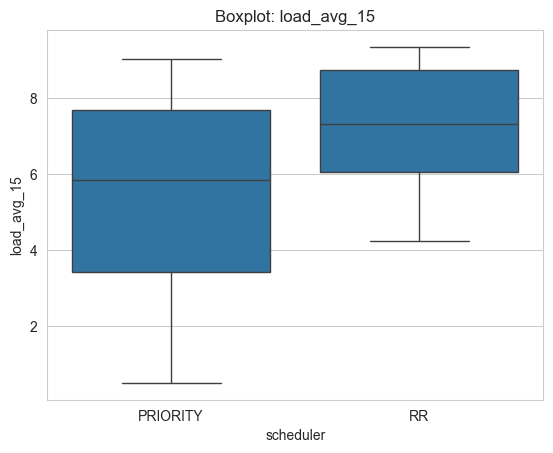

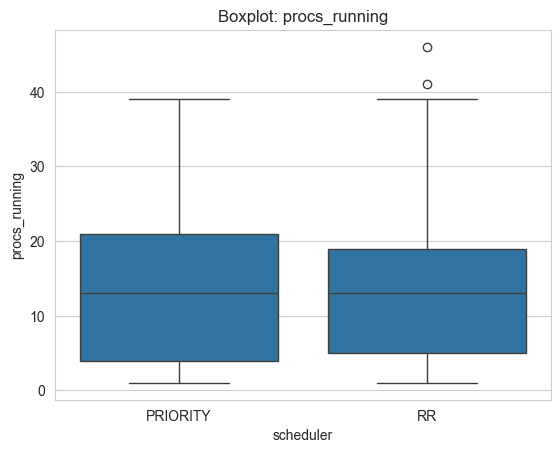

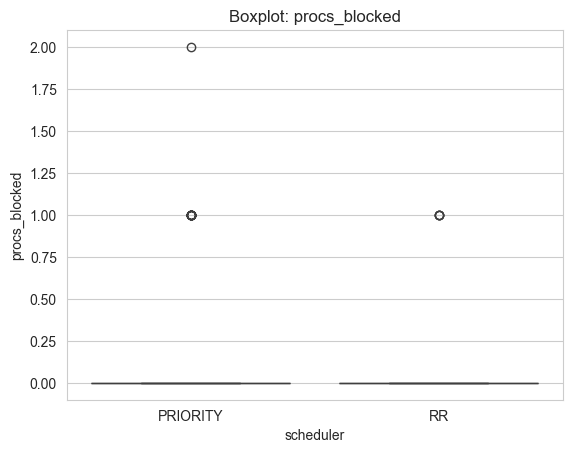

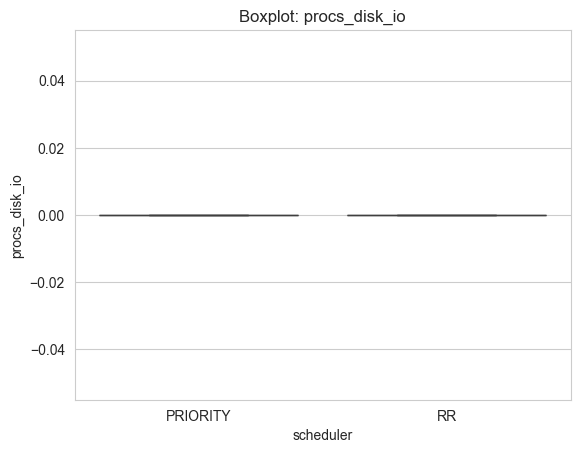

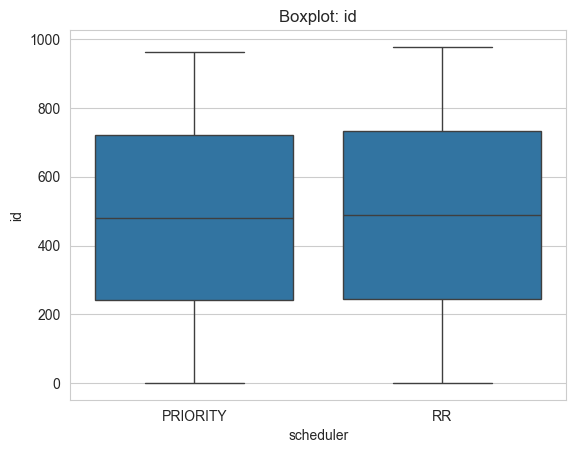

In [13]:
# Distribution Comparison - Boxplots
for col in metrics:
    plt.figure()
    sns.boxplot(data=df, x="scheduler", y=col)
    plt.title(f"Boxplot: {col}")
    plt.show()

In [ ]:
# TODO Spike / Stall Detection

In [ ]:
# TODO Correlation Structure